# Principal Component Analysis of Water Quality (Potability) using Machine Learning

# Author: Sheikh Sakib Hossain
### **ID: 40231548**

## Multiclass Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install** **Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 74.5 

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.0'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.13.1


In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/sakib2212/Water_Quality_PCA_ML/main/water_potability.csv')
df.head(7)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.720000  129.422921  18630.057858     6.640000         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.060000  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.540000  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.380000        86.990000   2.963135           1  
1       15.180013        56.329076   4.500656           1  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0

In [7]:
# Remove'#NUM!' values
df.replace('#NUM!', np.nan, inplace=True)

In [8]:
#convert this dataset to float
df = df.astype('float64')

In [9]:
# Count the nan and drop them
df.isna().any(axis=1).sum()
df.dropna(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   float64
dtypes: float64(10)
memory usage: 172.8 KB


In [11]:
print("Dataset Shape", df.shape)

Dataset Shape (2011, 10)


In [12]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [13]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [14]:
print("Dataset Shape", df.shape)

Dataset Shape (2011, 10)


**Exploratory Data Analysis**

In [15]:
sns.pairplot(df, hue='Potability')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

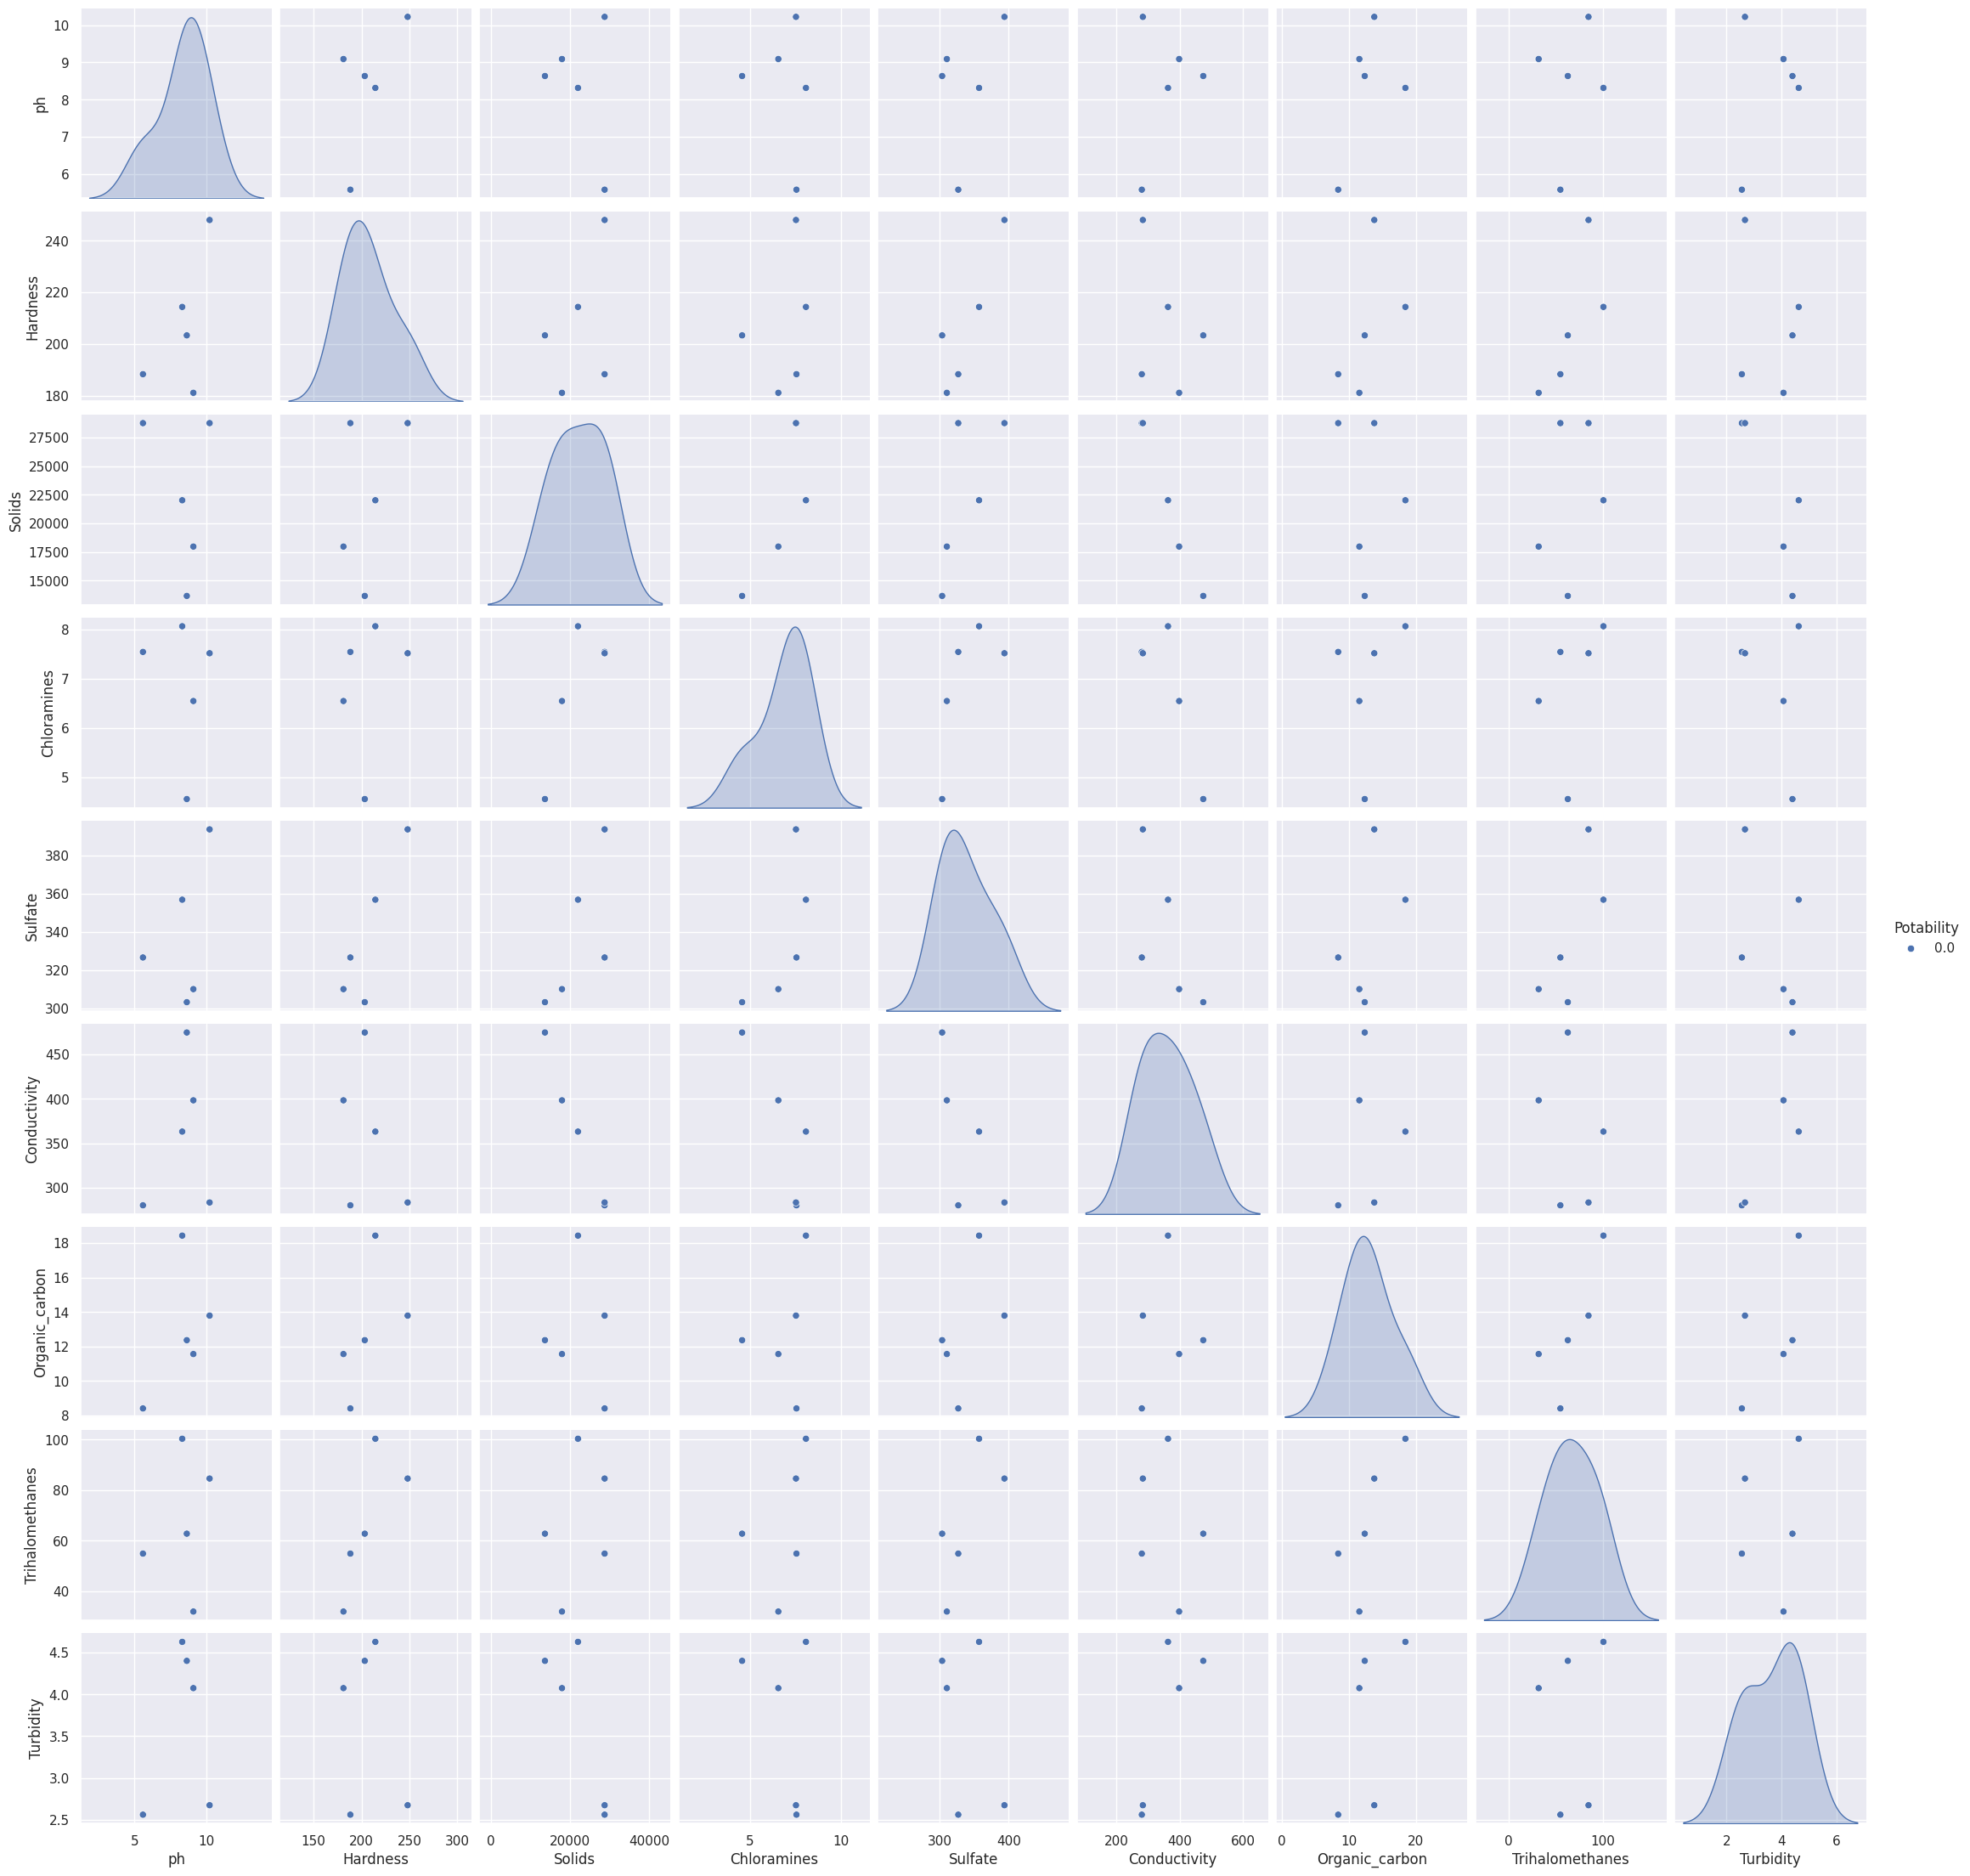

In [16]:
sns.pairplot(df[0:5], hue='Potability')
plt.show()

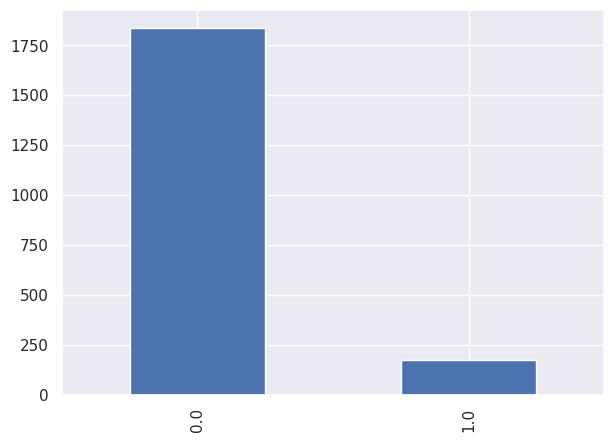

In [17]:
y = df['Potability']
y.value_counts().plot(kind='bar')
plt.ylabel('')
plt.show()

### **Data Matrix**

In [18]:
X = df.drop(columns=['Potability'])
X.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  \
3    8.316766  214.373394  22018.417441     8.060000  356.886136   
4    9.092223  181.101509  17978.986339     6.546600  310.135738   
5    5.584087  188.313324  28748.687739     7.540000  326.678363   
6   10.223862  248.071735  28749.716544     7.513408  393.663396   
7    8.635849  203.361523  13672.091764     4.563009  303.309771   
9   11.180284  227.231469  25484.508491     9.077200  404.041635   
10   7.360640  165.520797  32452.614409     7.550701  326.624353   
12   7.119824  156.704993  18730.813653     3.606036  282.344050   
15   6.347272  186.732881  41065.234765     9.629596  364.487687   
17   9.181560  273.813807  24041.326280     6.904990  398.350517   

    Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3     363.266516       18.436524       100.341674   4.628771  
4     398.410813       11.558279        31.997993   4.075075  
5     280.467916        8.399735        54.917862   2.559708  
6     283.651634       13.789695        84.603556   2.672989  
7     474.607645       12.363817        62.798309   4.401425  
9     563.885481       17.927806        71.976601   4.370562  
10    425.383419       15.586810        78.740016   3.662292  
12    347.715027       15.929536        79.500000   3.445756  
15    516.740000       11.539781        75.071617   4.376348  
17    477.974642       13.387341        71.460000   4.503661

In [19]:
X.describe().transpose()

count          mean          std         min           25%  \
ph               2011.0      7.086009     1.573323    0.227499      6.089715   
Hardness         2011.0    195.968079    32.635077   73.490000    176.744938   
Solids           2011.0  21917.441366  8642.239840  320.940000  15615.665390   
Chloramines      2011.0      7.134332     1.584818    1.390871      6.138895   
Sulfate          2011.0    333.224660    41.205167  129.000000    307.632511   
Conductivity     2011.0    426.526409    80.712574  201.619737    366.680307   
Organic_carbon   2011.0     14.357698     3.324980    2.200000     12.124105   
Trihalomethanes  2011.0     66.400870    16.077132    8.577013     55.952664   
Turbidity        2011.0      3.969734     0.780339    1.450000      3.442915   

                          50%           75%           max  
ph                   7.030000      8.051958     14.000000  
Hardness           197.191839    216.441070    317.338124  
Solids           20933.512750  27182.587067  56488.672413  
Chloramines          7.143907      8.109656     13.127000  
Sulfate            332.232177    359.330555    481.030642  
Conductivity       423.455906    482.373169    753.342620  
Organic_carbon      14.322019     16.683049     27.006707  
Trihalomethanes     66.542198     77.291925    124.000000  
Turbidity            3.968177      4.514175      6.494749

### **Standardize the Data**

In [20]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
0  0.782460  0.564114  0.011687     0.584230  0.574378     -0.783962   
1  1.275461 -0.455653 -0.455835    -0.370943 -0.560480     -0.348429   
2 -0.954856 -0.234614  0.790645     0.256035 -0.158910     -1.810063   
3  1.994907  1.596951  0.790764     0.239252  1.467140     -1.770608   
4  0.985319  0.226605 -0.954313    -1.622875 -0.726179      0.595858   
5  2.602958  0.958207  0.412851     1.226230  1.719071      1.702253   
6  0.174598 -0.933194  1.219336     0.262789 -0.160221     -0.014165   
7  0.021498 -1.203394 -0.368819    -2.226863 -1.235119     -0.976688   
8 -0.469657 -0.283054  2.216156     1.574872  0.758905      1.117992   
9  1.332258  2.385932  0.245817    -0.144748  1.580920      0.637584   

   Organic_carbon  Trihalomethanes  Turbidity  
0        1.227027         2.111648   0.844763  
1       -0.842145        -2.140396   0.135029  
2       -1.792325        -0.714422  -1.807390  
3       -0.170871         1.132491  -1.662185  
4       -0.599816        -0.224136   0.553348  
5        1.073990         0.346898   0.513787  
6        0.369752         0.767688  -0.394083  
7        0.472854         0.814970  -0.671641  
8       -0.847710         0.539456   0.521204  
9       -0.291911         0.314757   0.684395

In [21]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
ph               2011.0 -8.126545e-17  1.000249 -4.360335 -0.633399 -0.035608   
Hardness         2011.0 -1.033485e-16  1.000249 -3.753892 -0.589180  0.037508   
Solids           2011.0  1.598809e-16  1.000249 -2.499569 -0.729365 -0.113879   
Chloramines      2011.0  3.709945e-16  1.000249 -3.624952 -0.628264  0.006043   
Sulfate          2011.0 -1.441578e-15  1.000249 -4.957520 -0.621245 -0.024092   
Conductivity     2011.0 -2.473296e-17  1.000249 -2.787207 -0.741656 -0.038052   
Organic_carbon   2011.0  9.893186e-17  1.000249 -3.657382 -0.671928 -0.010733   
Trihalomethanes  2011.0  6.041910e-16  1.000249 -3.597547 -0.650042  0.008793   
Turbidity        2011.0  3.533281e-16  1.000249 -3.229829 -0.675283 -0.001995   

                      75%       max  
ph               0.614107  4.395607  
Hardness         0.627487  3.719931  
Solids           0.609385  4.001258  
Chloramines      0.615570  3.782237  
Sulfate          0.633716  3.587966  
Conductivity     0.692094  4.050143  
Organic_carbon   0.699532  3.805182  
Trihalomethanes  0.677594  3.583566  
Turbidity        0.697873  3.236598

### Observations and variables

In [22]:
observations = list(df.index)
variables = list(df.columns)

### Box and Whisker Plots

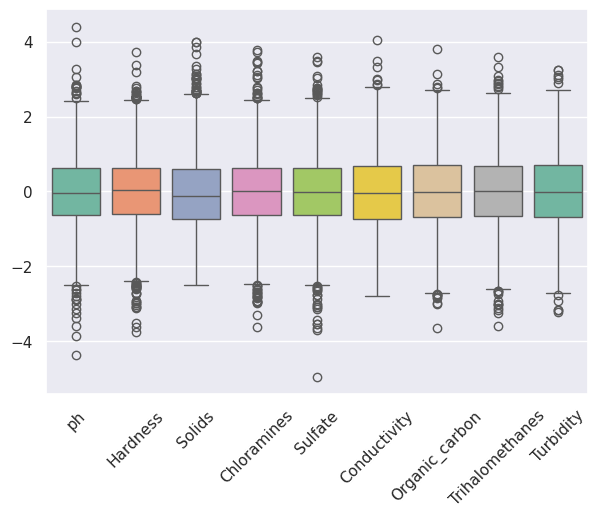

In [23]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

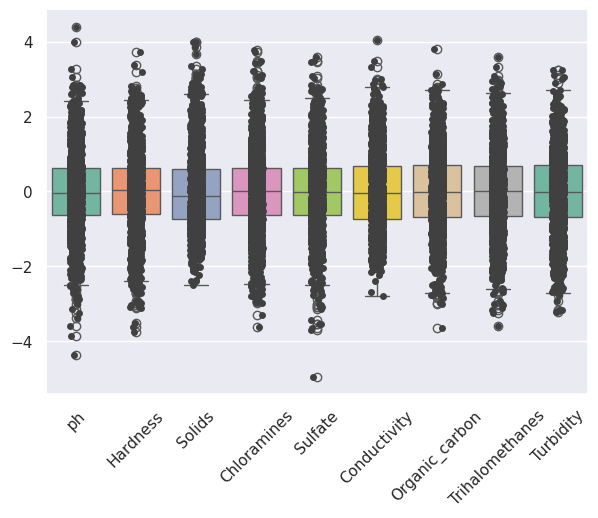

In [24]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Correlation Matrix

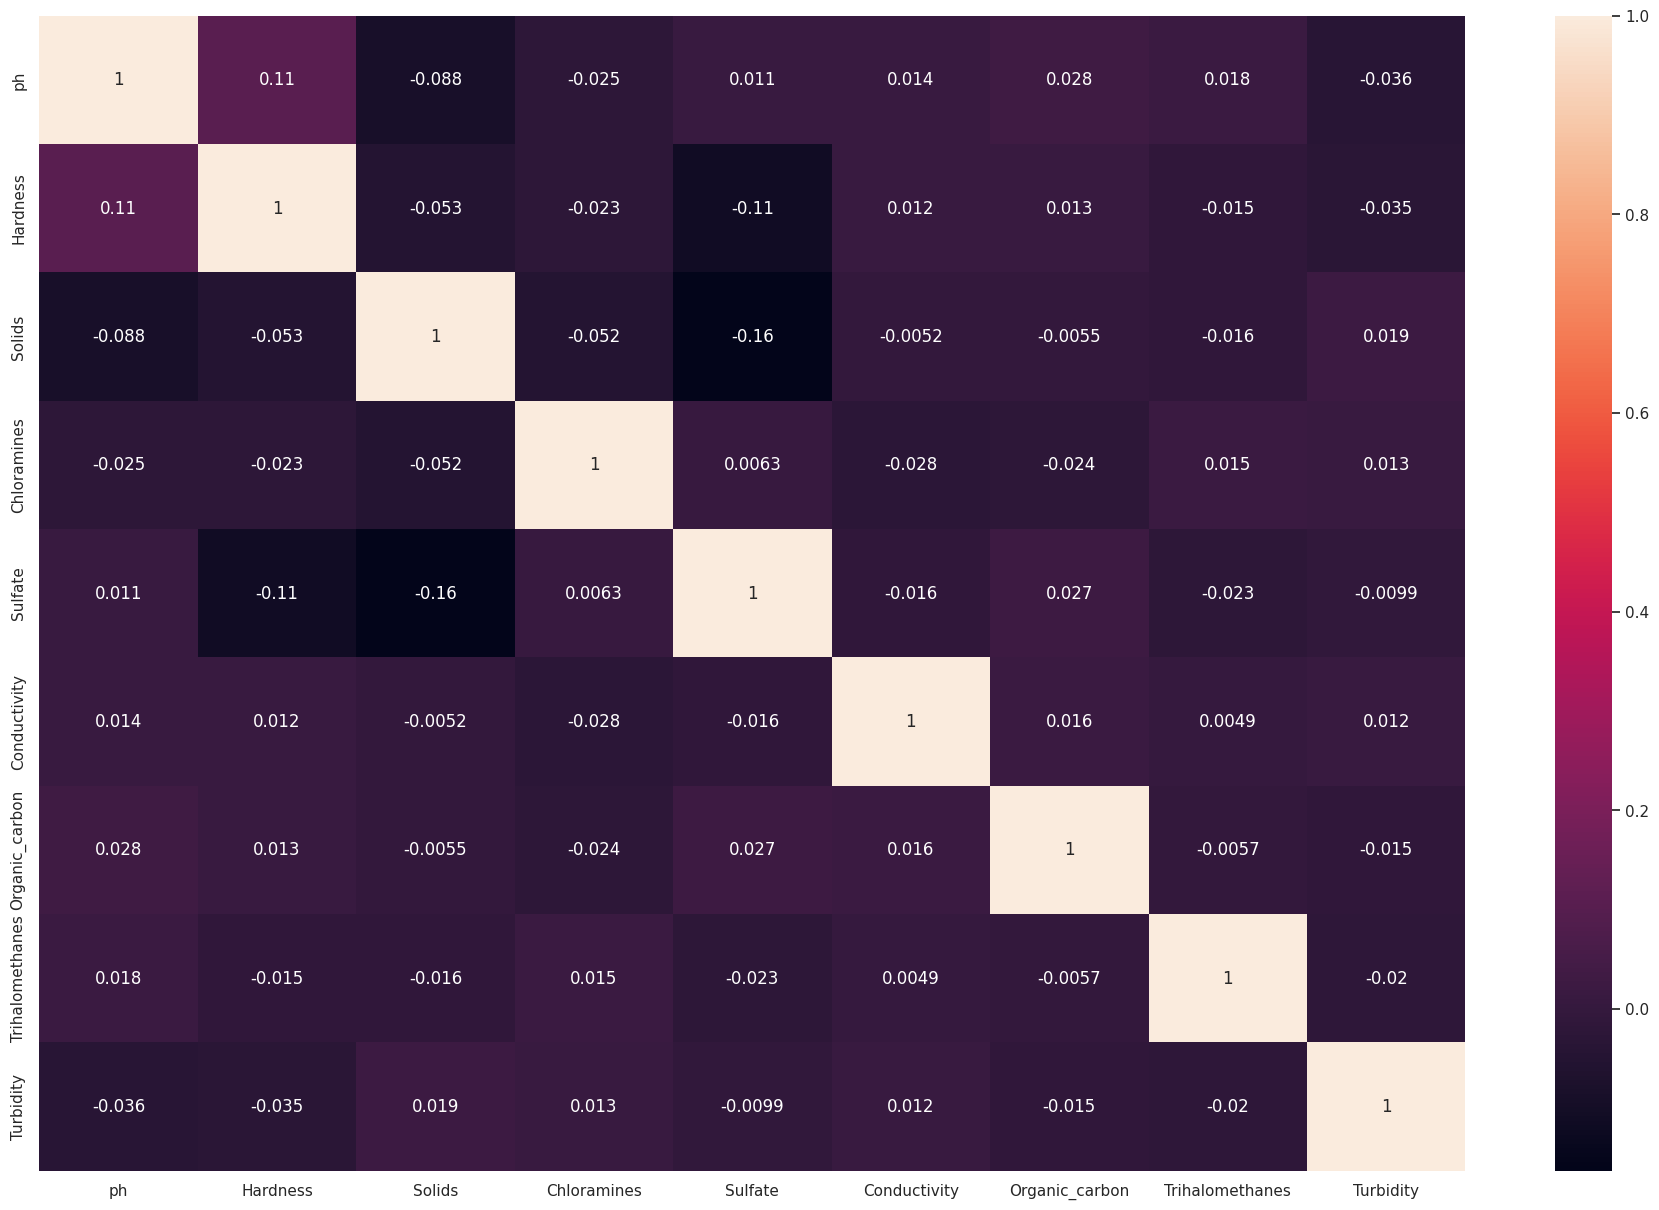

In [25]:
plt.figure(figsize=(23, 15))
sns.heatmap(X.corr(), annot=True)
plt.show()
# ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.9, annot=True, cbar=False, square=True)
# plt.yticks(rotation=0)
# ax.tick_params(labelbottom=False,labeltop=True)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## Principal Component Analysis (PCA)

Text(0, 0.5, '$Z_2$')

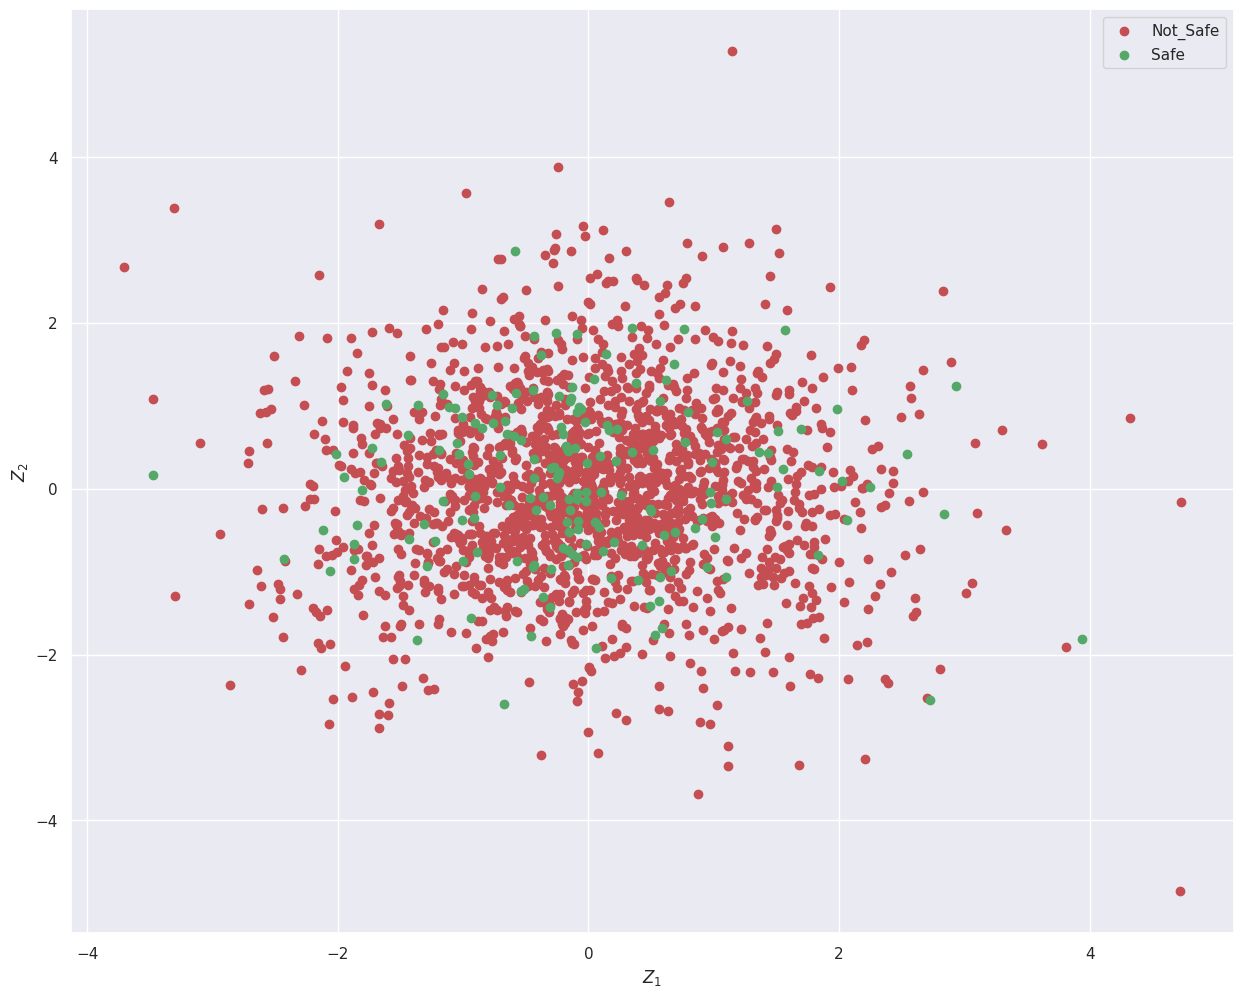

In [26]:
pca = PCA()
Z = pca.fit_transform(X)

# Not_safe->0,  Safe->1
not_safe = np.where(y == 0)
safe = np.where(y == 1)

plt.figure(figsize=(15, 12))

plt.scatter(Z[not_safe,0], Z[not_safe,1], c='r', label='Not_Safe')
plt.scatter(Z[safe,0], Z[safe,1], c='g', label='Safe')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

### Eigenvectors

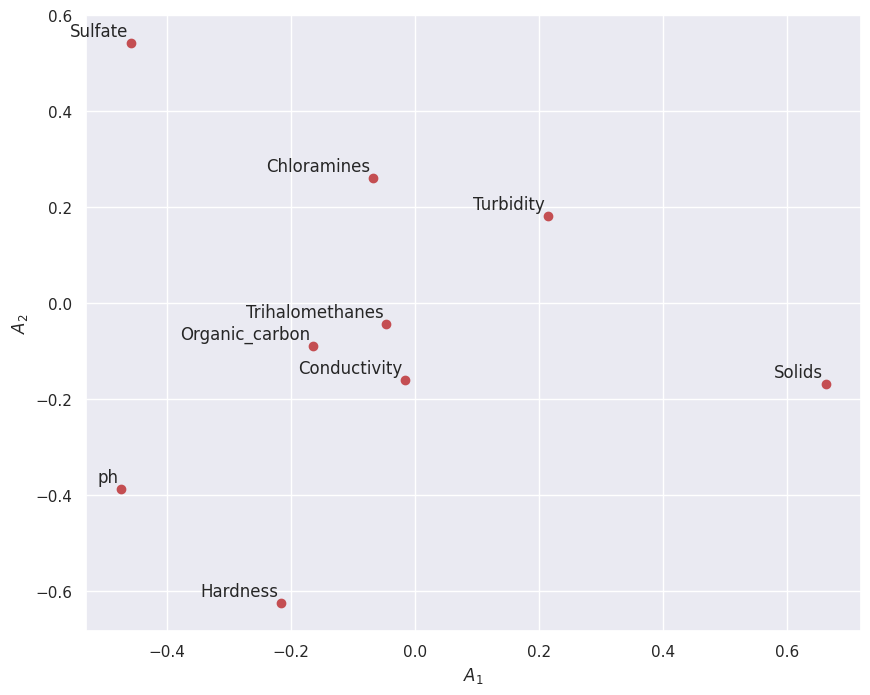

In [27]:
A = pca.components_.T
plt.figure(figsize=(10, 8))
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

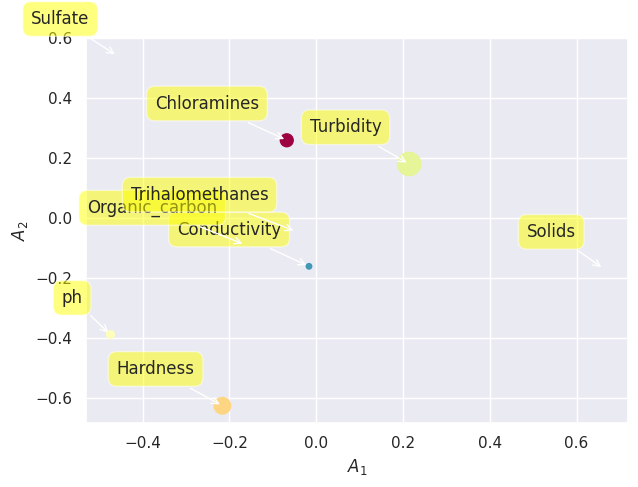

In [28]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

## Scree plot

Text(0, 0.5, 'Explained variance')

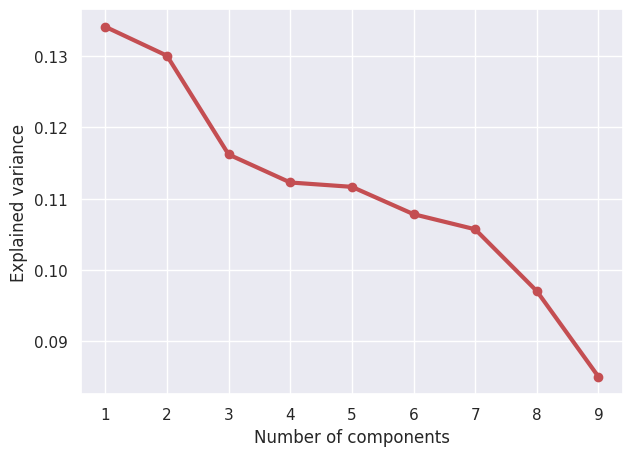

In [29]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

### Explained Variance

Text(0, 0.5, 'Cumulative explained variance')

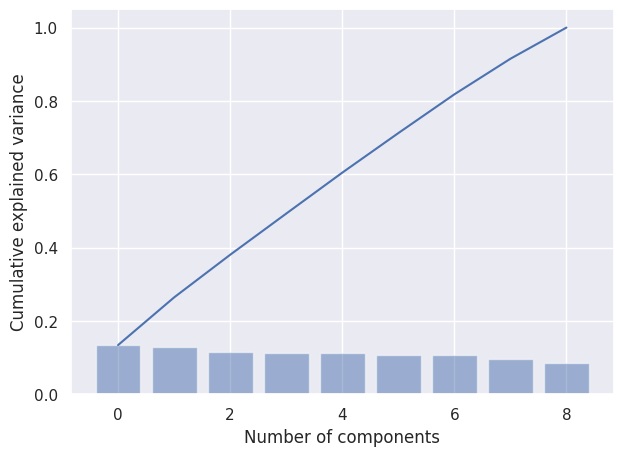

In [30]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

### Biplot

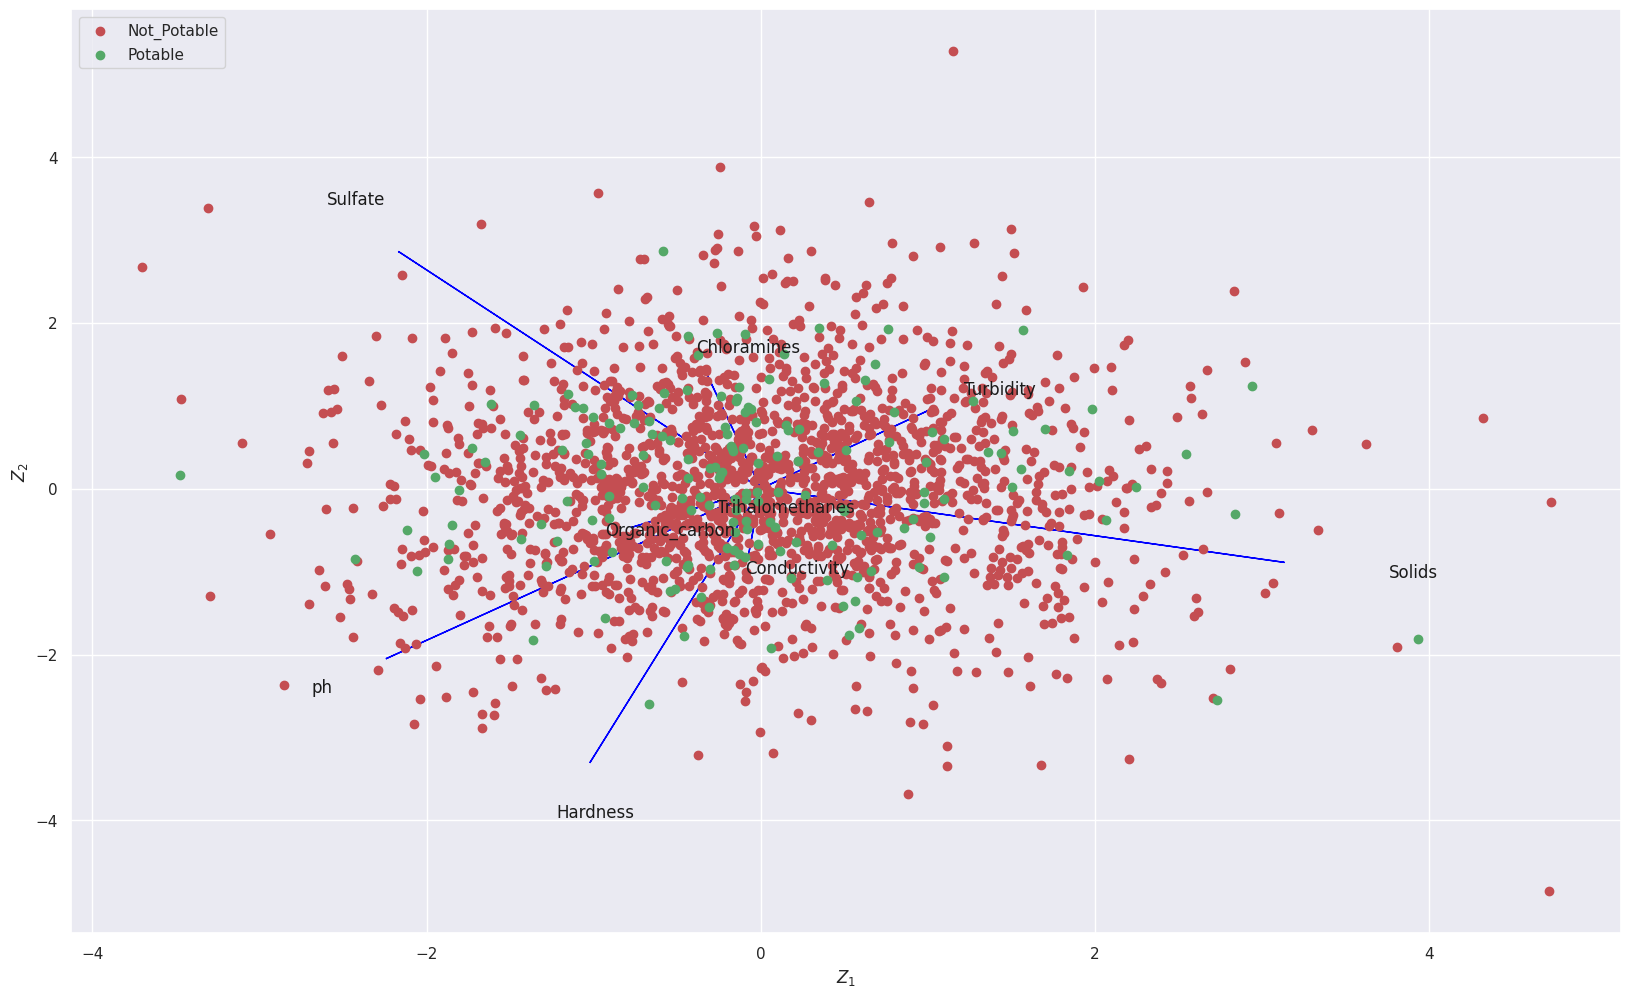

In [31]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure(figsize= (20, 12))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
    # arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='blue', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2, variables[i], color='k')

# Define indices for potable and not potable
potable = (df['Potability'] == 1).values
not_potable = (df['Potability'] == 0).values

plt.scatter(Z[not_potable,0], Z[not_potable,1], c='r', label='Not_Potable')
plt.scatter(Z[potable,0], Z[potable,1], c='g', label='Potable')

plt.legend(loc='upper left')
plt.show()

## Using PCA Library

In [32]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.9 MB/s eta 0:00:00


In [33]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


## Principal Components

In [34]:
out['PC']

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -0.892908 -0.119983 -0.699707 -1.042277 -0.633466 -1.682115 -1.577297   
1    -0.254349 -0.283462  0.306362  1.743247  0.945923  0.912408 -0.002883   
2     1.052186  0.520023 -1.491836 -0.317465  2.349533  1.454989  0.763279   
3    -1.807480 -1.101499 -1.305528 -1.273703  1.674126  0.223280 -0.777060   
4    -0.487877 -1.111323  0.642718  0.653449 -0.639682  1.193550 -0.913138   
...        ...       ...       ...       ...       ...       ...       ...   
2006 -0.461724 -0.751656 -0.562277  1.550380  0.089220  1.026686 -1.001777   
2007 -0.130945 -0.189670  0.150253  1.324368  2.197289 -0.570949  0.910839   
2008  1.337524  0.012733  0.375442  0.535627  0.042727 -1.184714  0.215115   
2009  0.576430  0.641097 -0.326262  0.072496  0.397241  0.478402  0.605462   
2010  2.542607  0.418782  0.975653 -0.199124 -0.737518  0.021569  0.645419   

           PC8       PC9  
0    -0.060066 -0.885911  
1     1.290669  1.119456  
2     0.001316 -0.157351  
3     0.860035 -2.138120  
4    -0.023469  1.088099  
...        ...       ...  
2006  0.390202  0.520351  
2007 -0.144732  0.962728  
2008  4.736354  1.584929  
2009  0.047368 -0.383463  
2010  0.042741 -2.221031  

[2011 rows x 9 columns]

## Scatter plot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)'>)

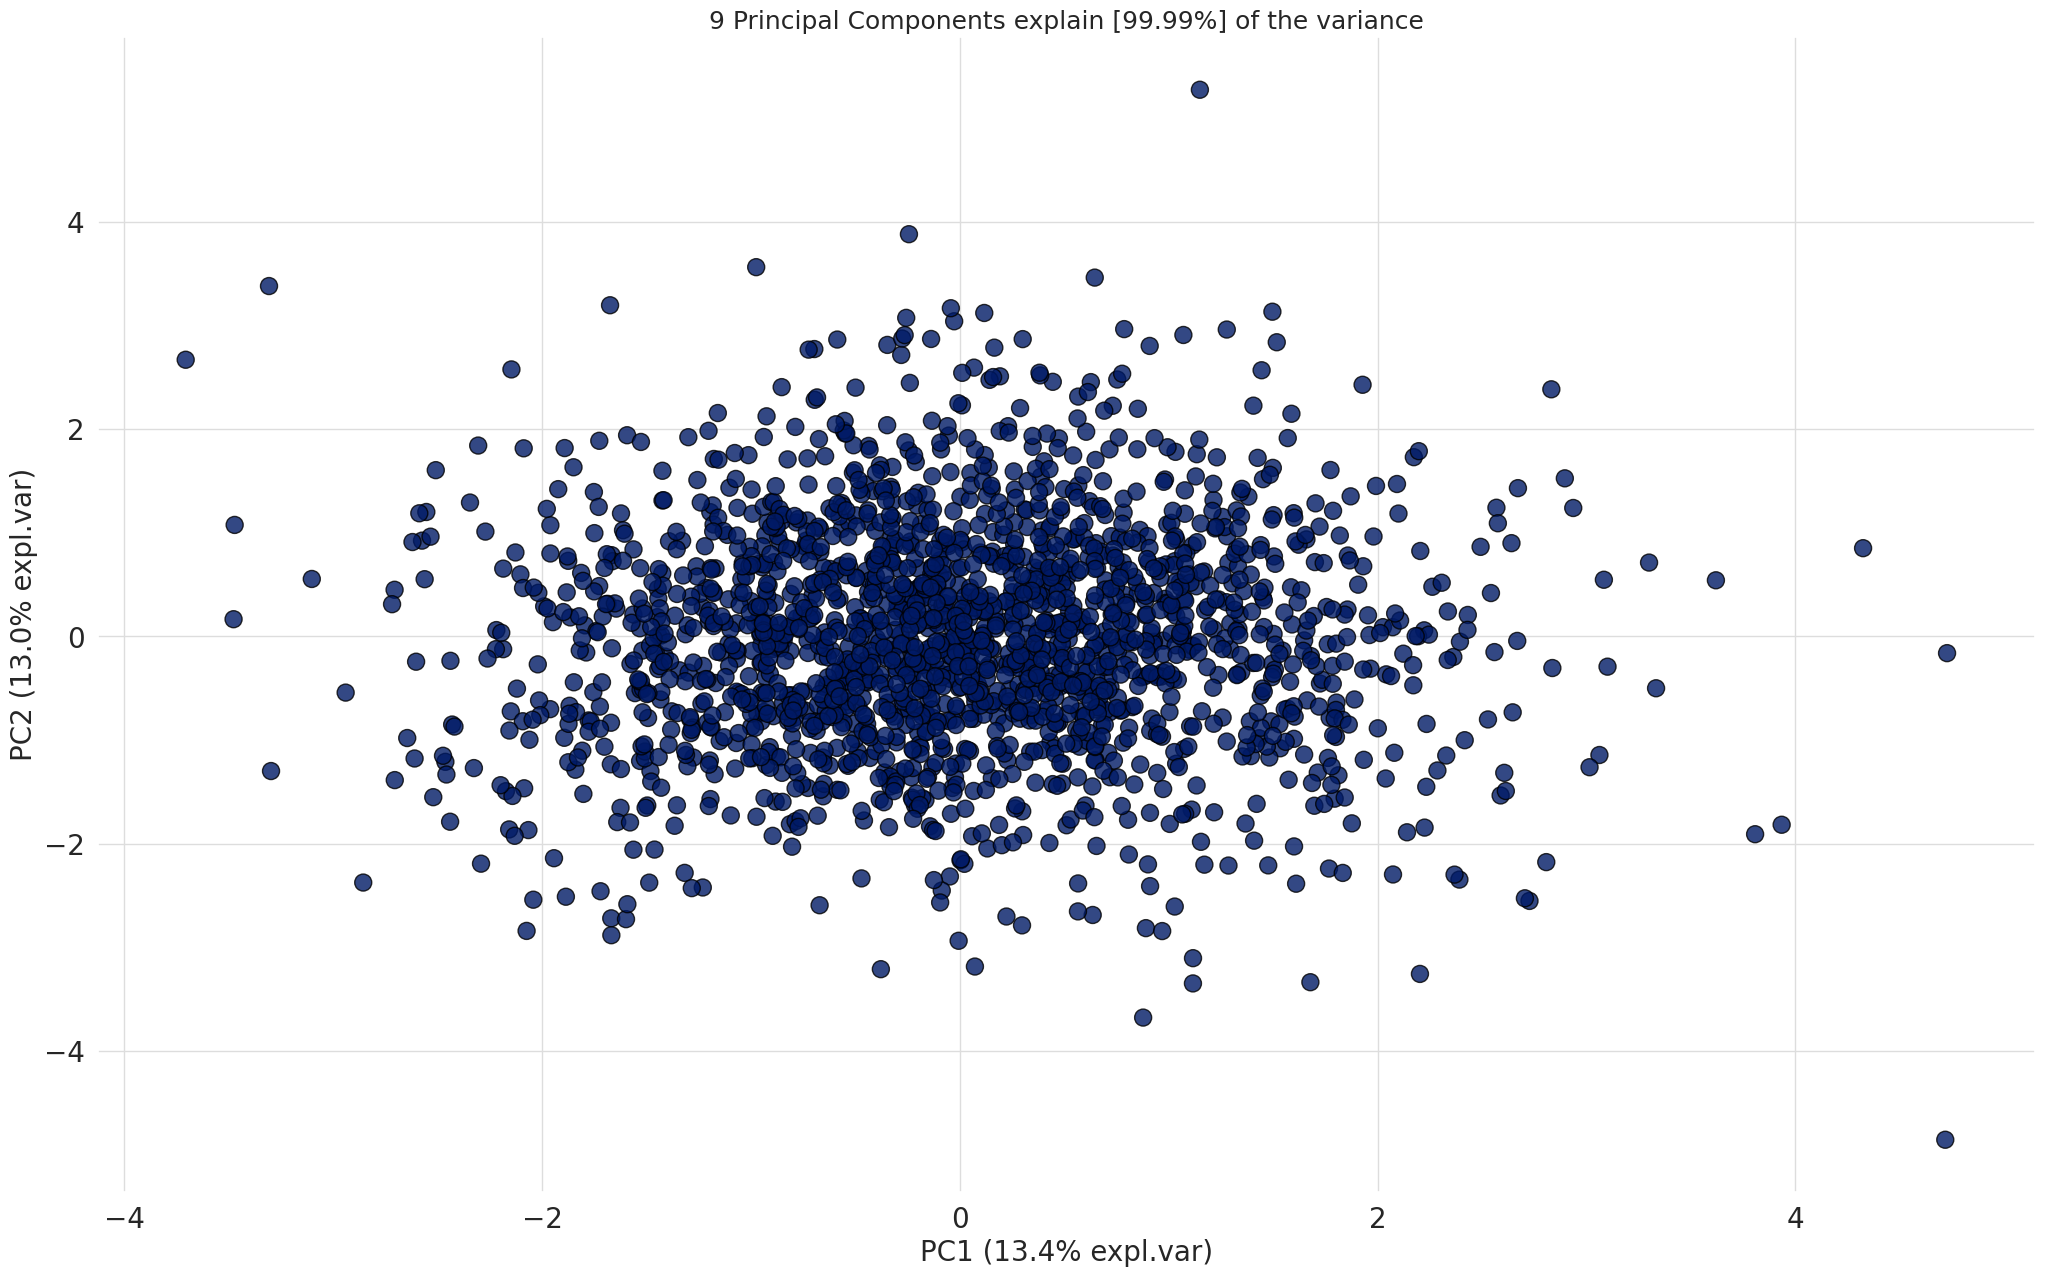

In [35]:
model.scatter(label=True, legend=False)

### Eigenvectors

In [36]:
A = out['loadings'].T

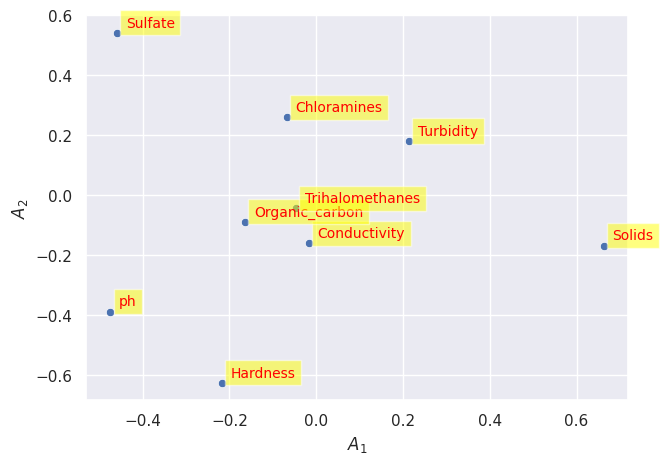

In [37]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

### Scree Plot

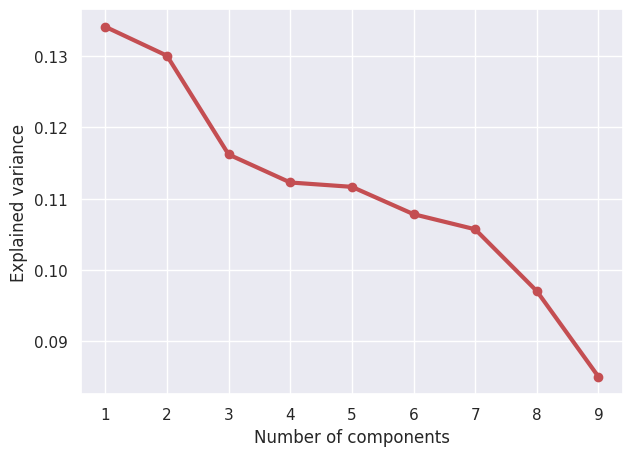

In [38]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Explained Variance Plot

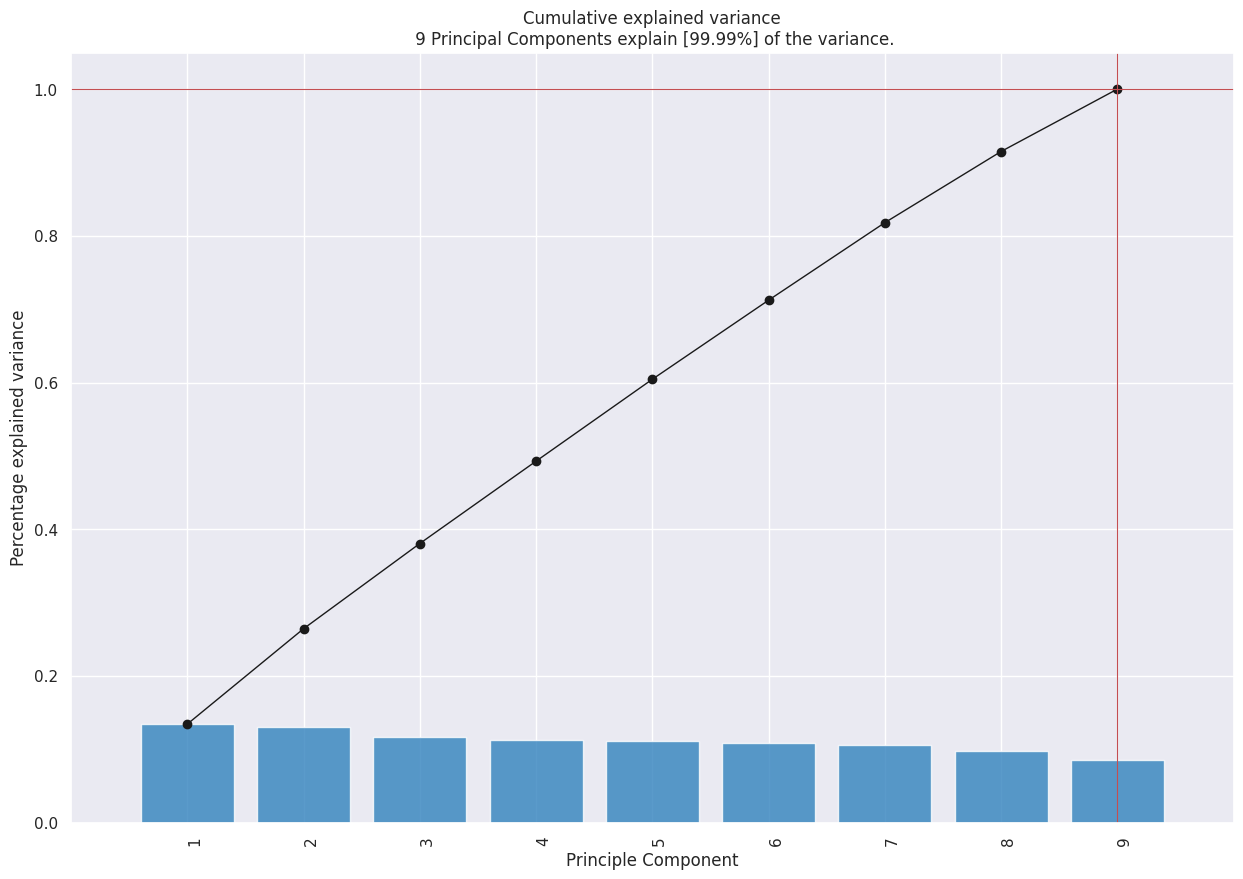

In [39]:
model.plot();

Biplot

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)'>)

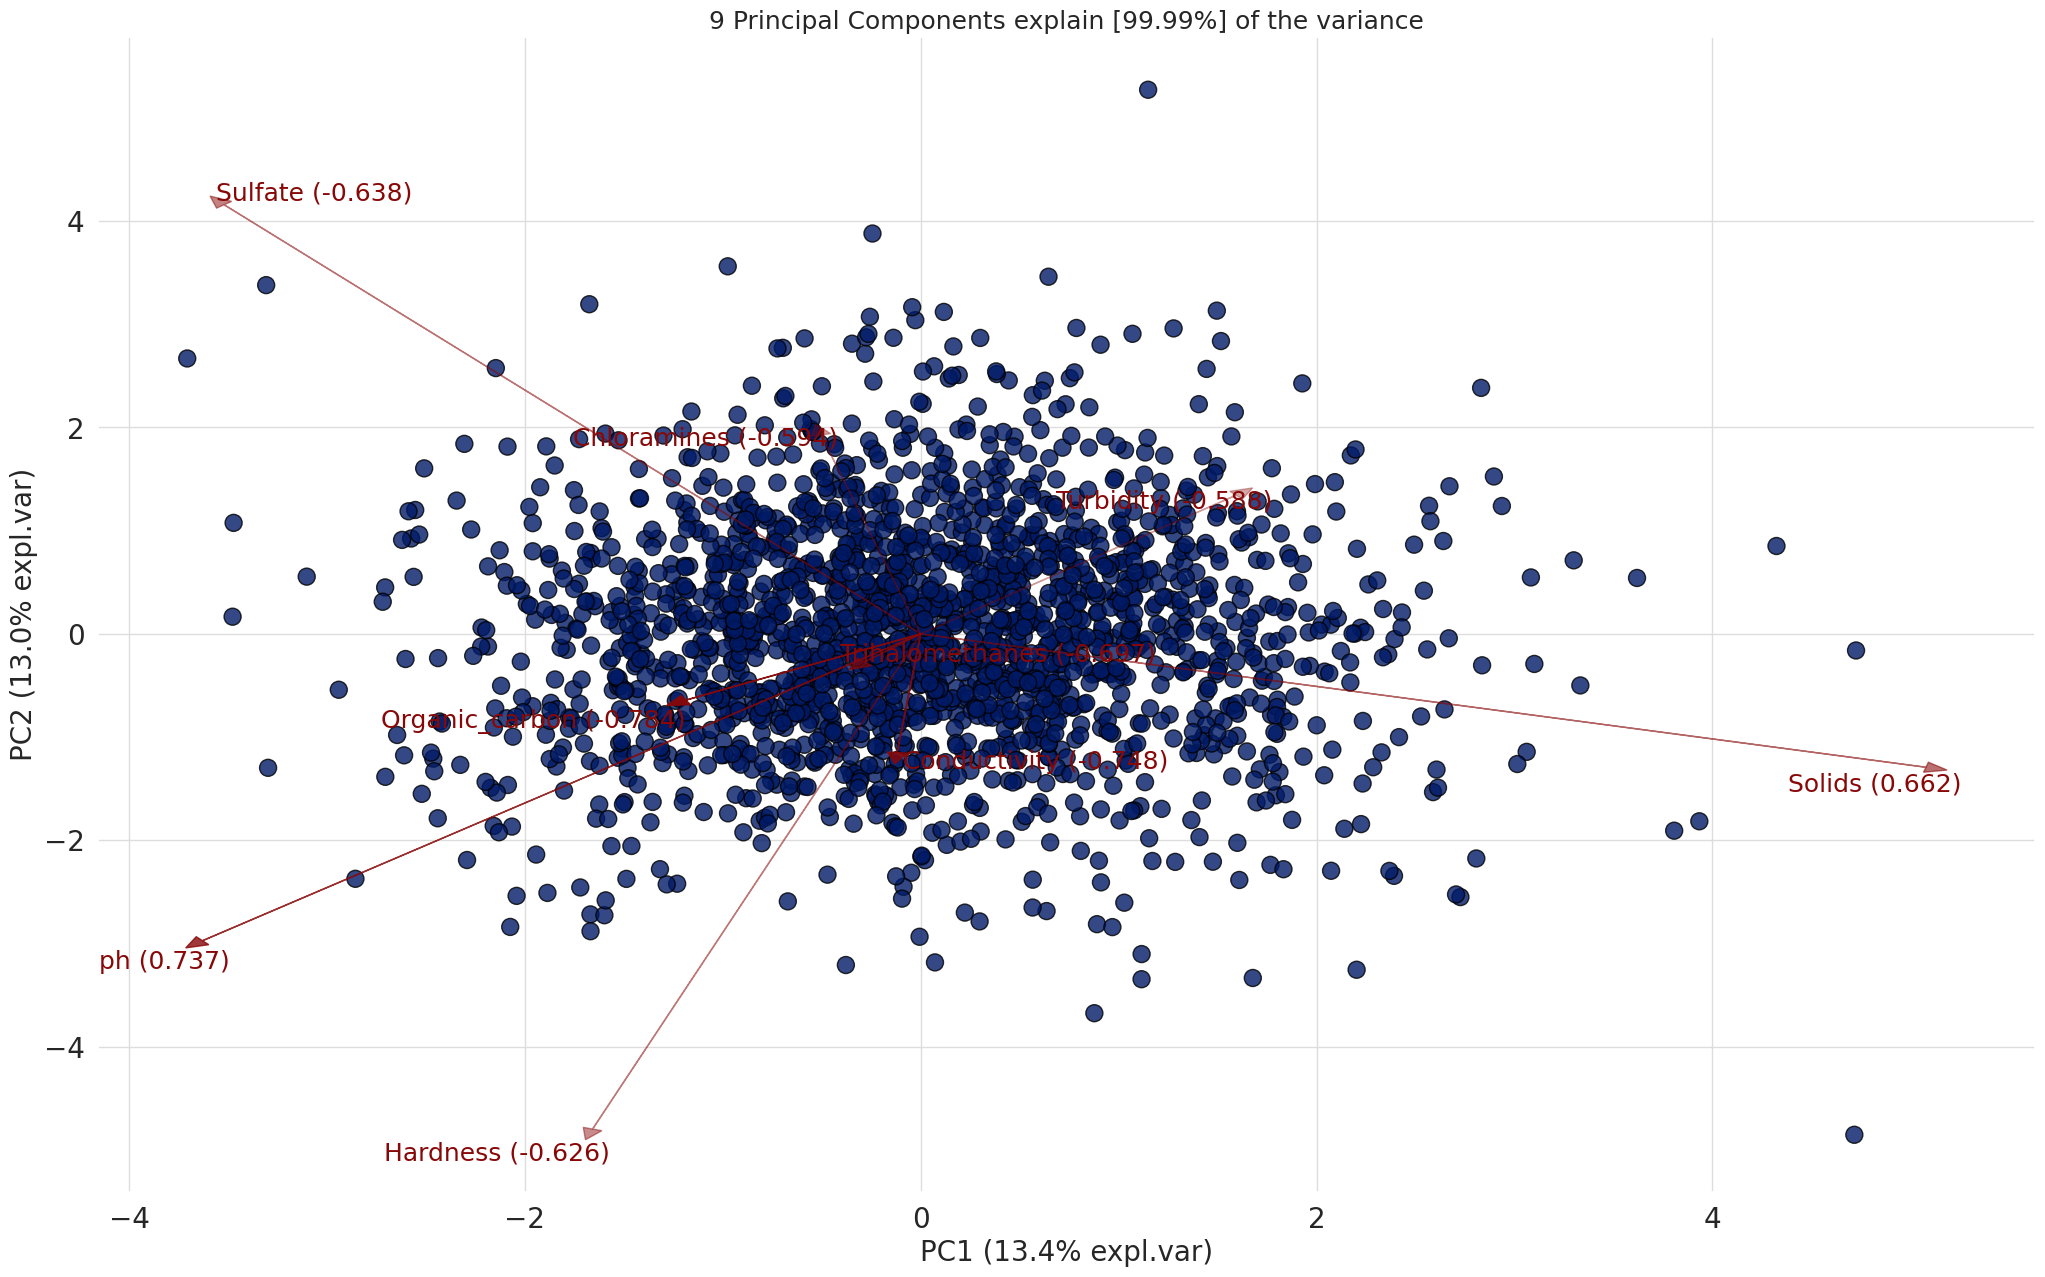

In [40]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3D: title={'center': '9 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)', zlabel='PC3 (11.6% expl.var)'>)

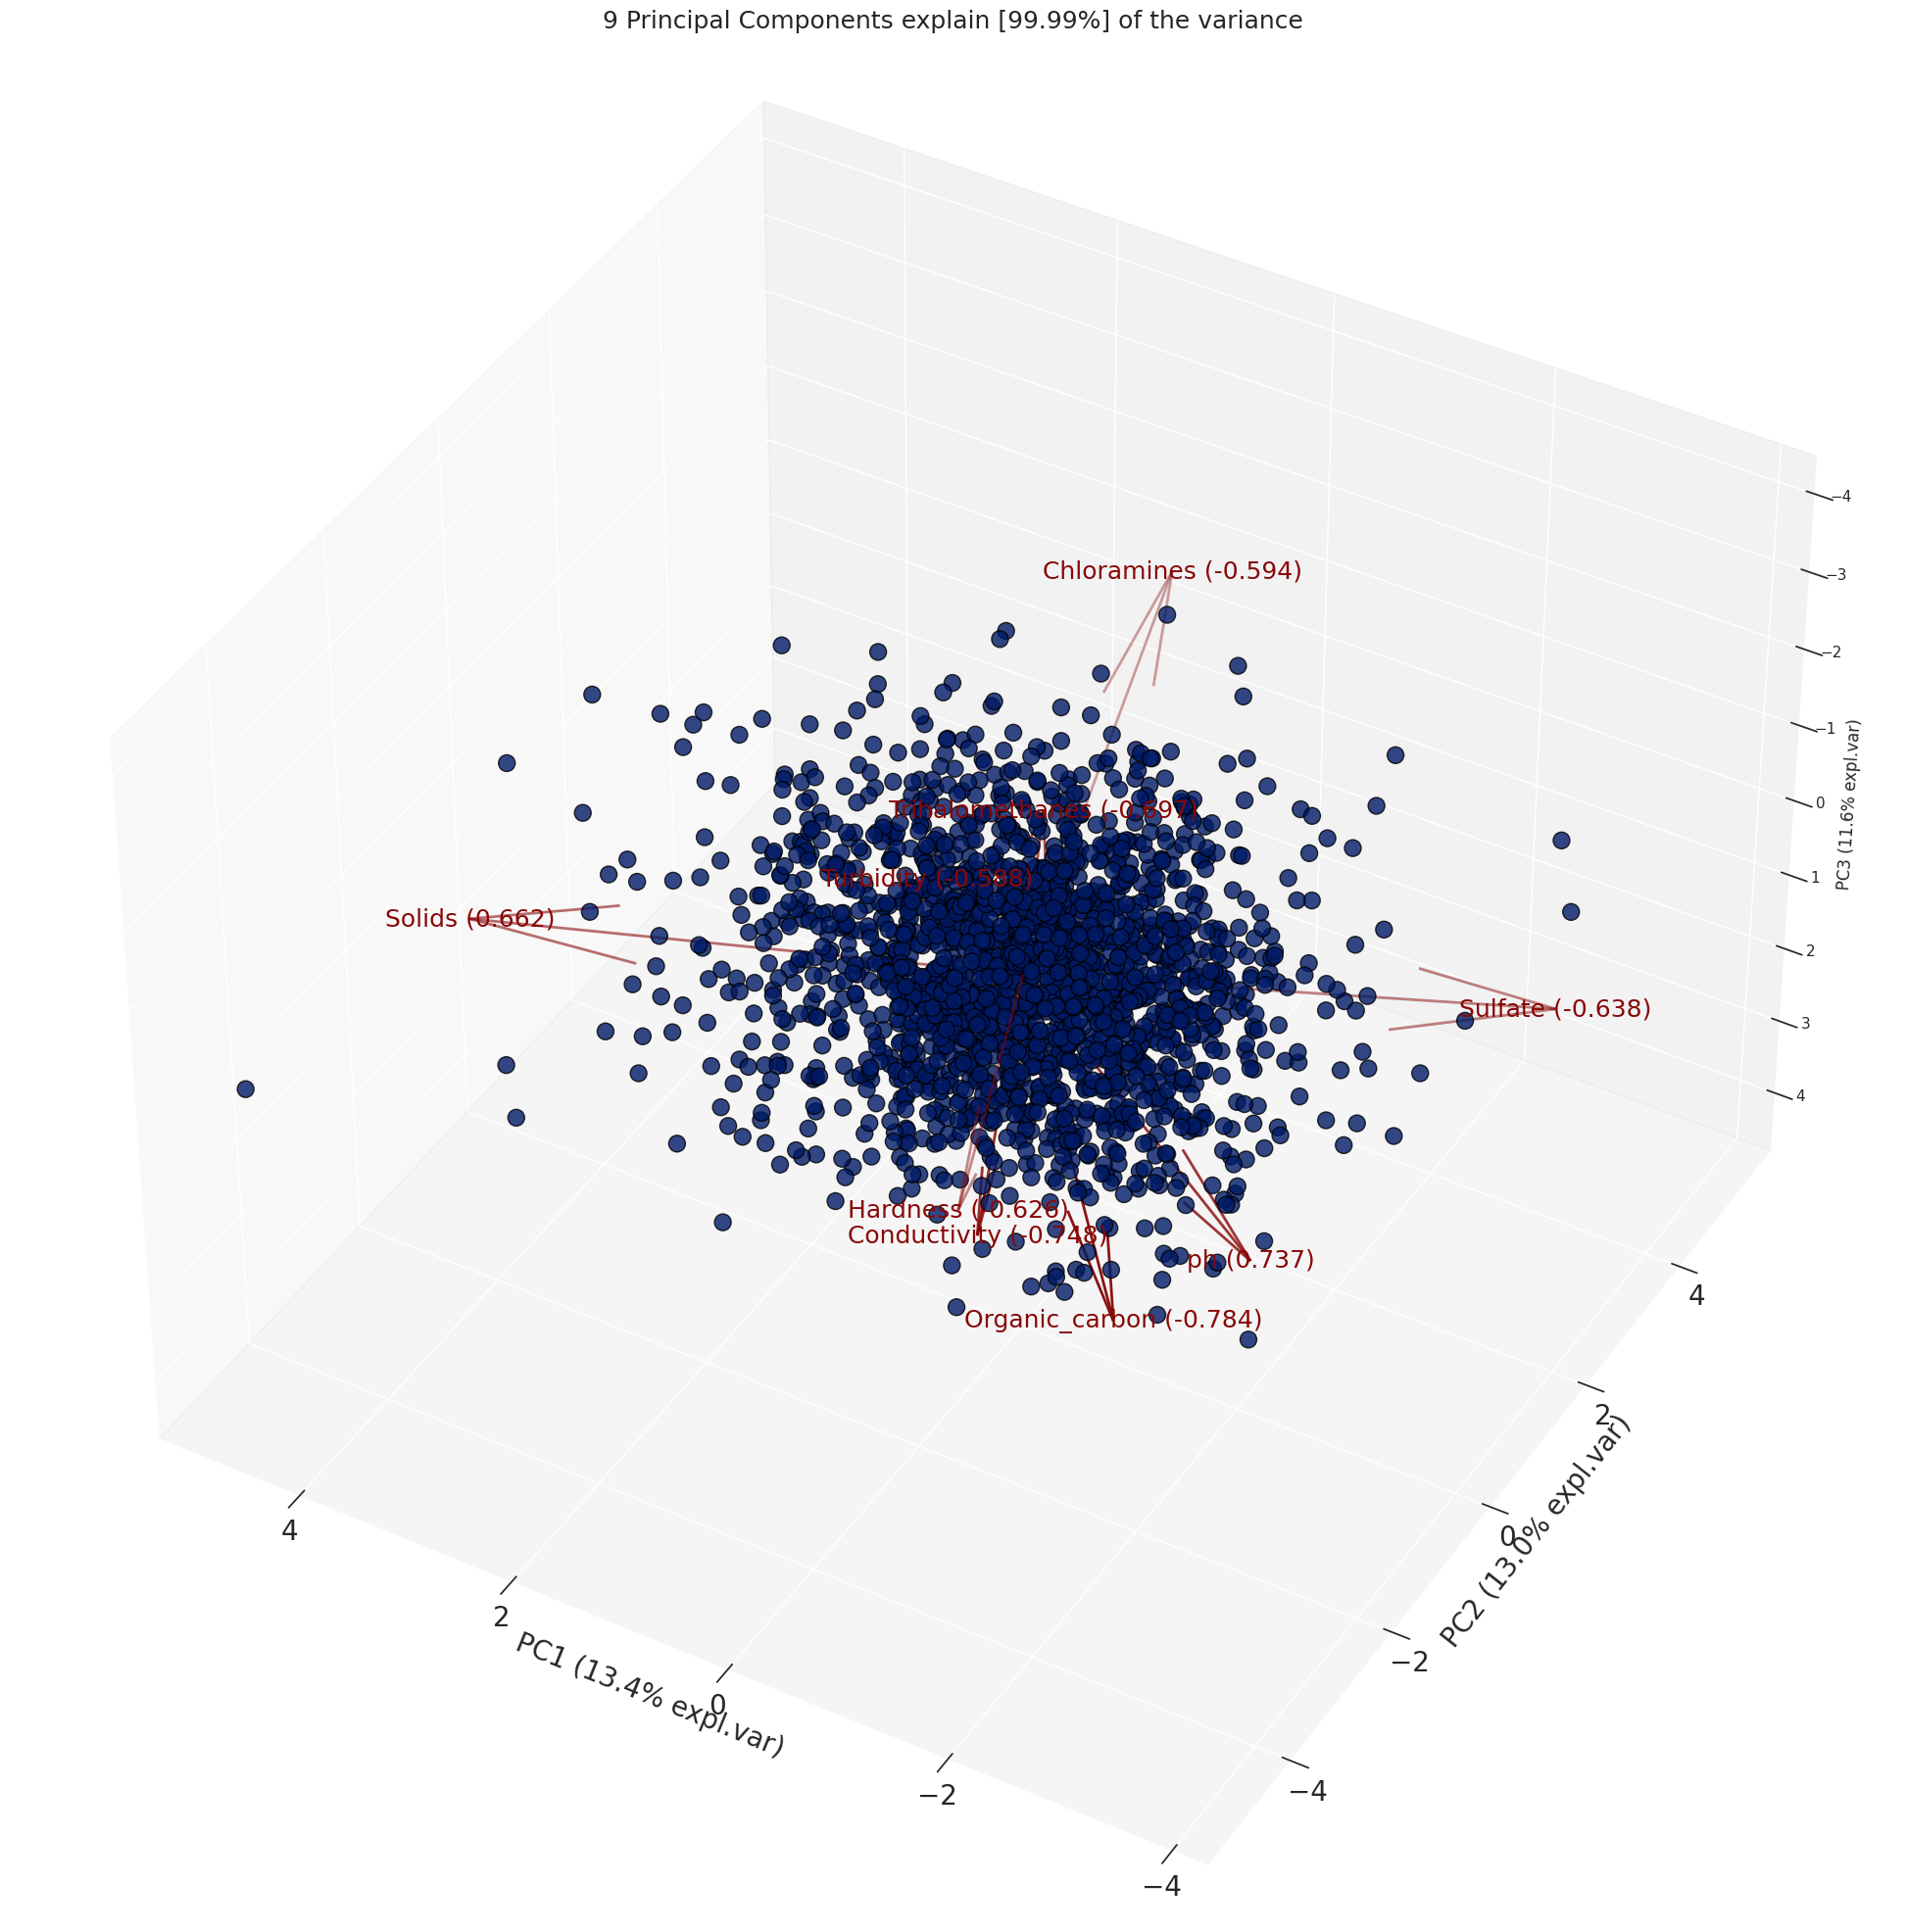

In [41]:
model.biplot3d(legend=False)

# **Classification**

### **Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [42]:
# For Google Colab only
# from pycaret.utils import enable_colab
# enable_colab()

In order to demonstrate the predict_model() function on unseen data, a sample of 10 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 10 records were not available at the time when the machine learning experiment was performed.

In [43]:
data = df.sample(frac=0.8, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (1609, 10)
Unseen Data For Predictions: (402, 10)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [44]:
from pycaret.classification import *
clf = setup(data=data, target='Potability', train_size=0.7, session_id=123)

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:



*   session_id : A pseduo-random number distributed as a seed in all functions later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.
*   Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

*   Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.
*   Original Data : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

*   Missing Values : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.
*   Numeric Features : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

*   Categorical Features : The number of features inferred as categorical. In this dataset, there are no categorical features.


*   Transformed Train Set : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

*   Transformed Test Set : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.


Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.

### Comparing All Models

In [45]:
#show the best model and their statistics
from pycaret.classification import compare_models

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Your code for loading data, preprocessing, etc.

best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [46]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.



*   Decision Tree Classifier ('dt')
*   K Neighbors Classifier ('knn')

*   Logistic Regression ('lr')


*   Random Forest ('rf')



There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

### Create Decision Tree Classifier

In [47]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [48]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [49]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [50]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.01, min_samples_leaf=6,
                       min_samples_split=5, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

### **Evaluate Decision Tree Model**

In [51]:
!pip install statsmodels --upgrade

### **How to analyze model performance using various plots**

In [52]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [53]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [54]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


### Evaluate K Neighbors Model

In [55]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [56]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [57]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Logistic Regression Model**

In [58]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [59]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [60]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [61]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Tune the Best Model**

In [62]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [63]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

### **Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [65]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## **Classification + PCA**

In [66]:
clf_pca = setup(data=data, target='Potability', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [67]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [68]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [69]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [70]:
tuned_best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [71]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…